In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/jagdi/projects/artifacts/raw.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
print("Categories in 'gender' variable :   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:   ",end=" ")
print(df["race_ethnicity"].unique())

print("Categories in 'parental_level_of_education' variable:   ",end=" ")
print(df["parental_level_of_education"].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df["lunch"].unique())

print("categories in 'test prepration course' variable :    ",end=" ")
print(df["test_preparation_course"].unique())

Categories in 'gender' variable :    ['female' 'male']
Categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
categories in 'test prepration course' variable :     ['none' 'completed']


In [14]:
#Define categorical and Numerical features
num_features = [feature for feature in df.columns if df[feature].dtypes != 'object']
cat_features= [feature for feature in df.columns if df[feature].dtypes == 'object']

#print columns
print('we have {} numerical features: {}'.format(len(num_features), num_features))
print('we have {} categoical features: {}'.format(len(cat_features), cat_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categoical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for toal score and average

In [15]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Numbers of students eith full marks in  math: {math_full}')
print(f'Number of students with full marks in writing : {writing_full}')
print(f'Number of students with dull marks in reading: {reading_full}')

Numbers of students eith full marks in  math: 7
Number of students with full marks in writing : 14
Number of students with dull marks in reading: 17


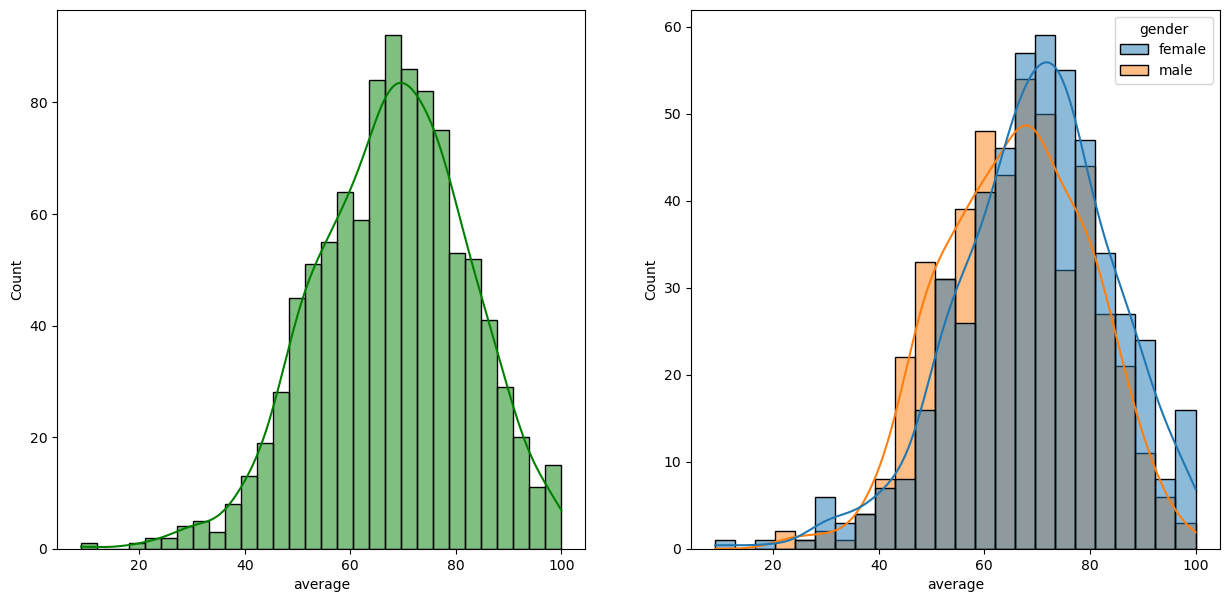

In [21]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

[]

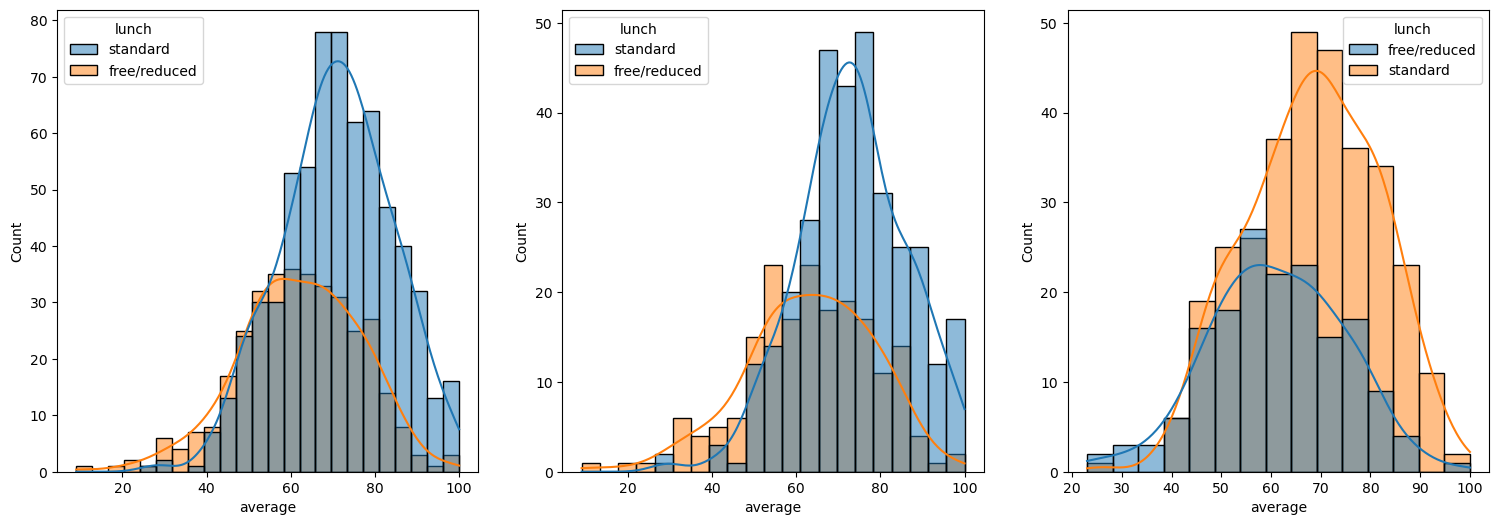

In [23]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x= 'average', kde=True, hue='lunch')
plt.plot()

[]

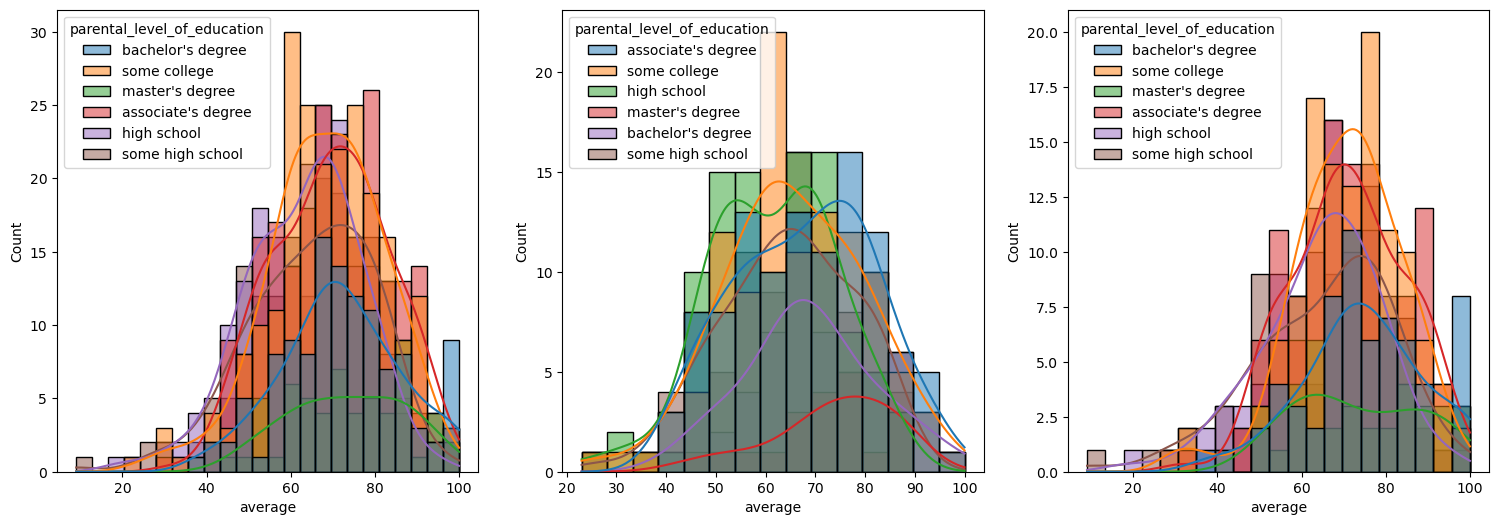

In [25]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'male'], x='average',kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True,hue='parental_level_of_education')
plt.plot()

[]

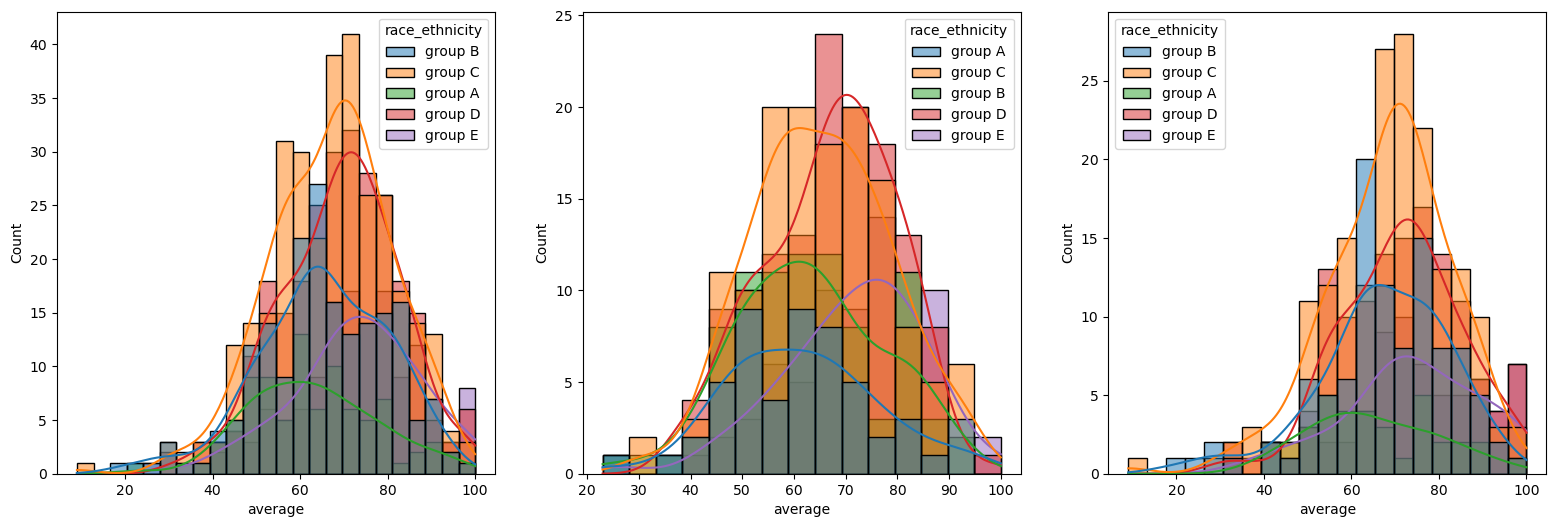

In [27]:
plt.subplots(1,3, figsize=(26,6))
plt.subplot(141)
sns.histplot(data=df,x='average', kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average', kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.plot()

[]

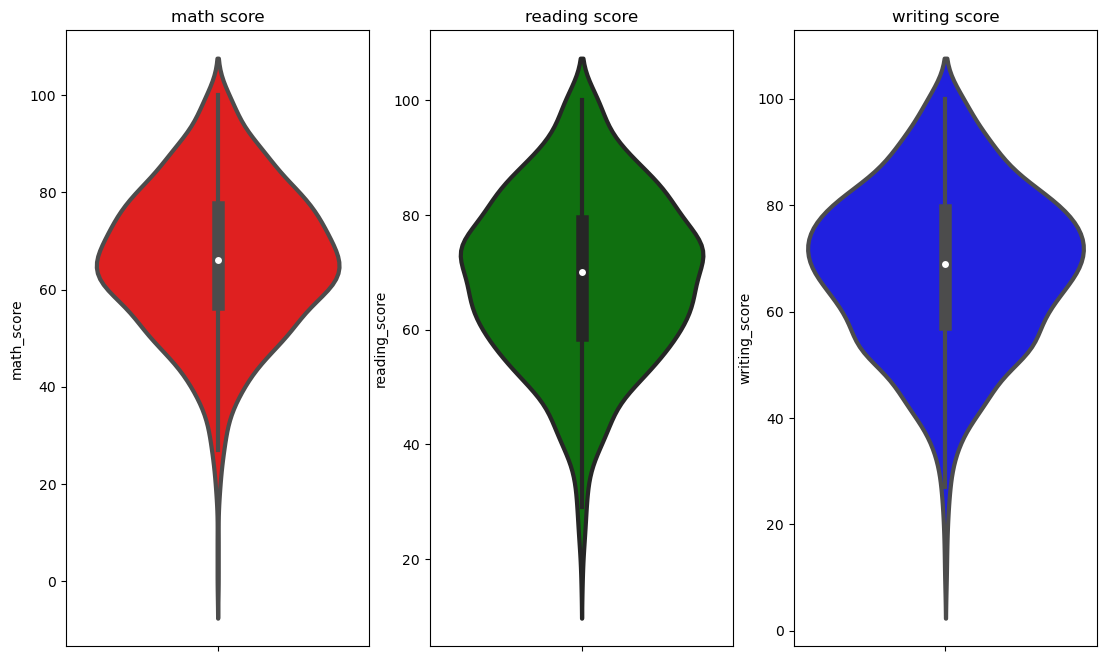

In [30]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('math score')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('reading score')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('writing score')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.plot()

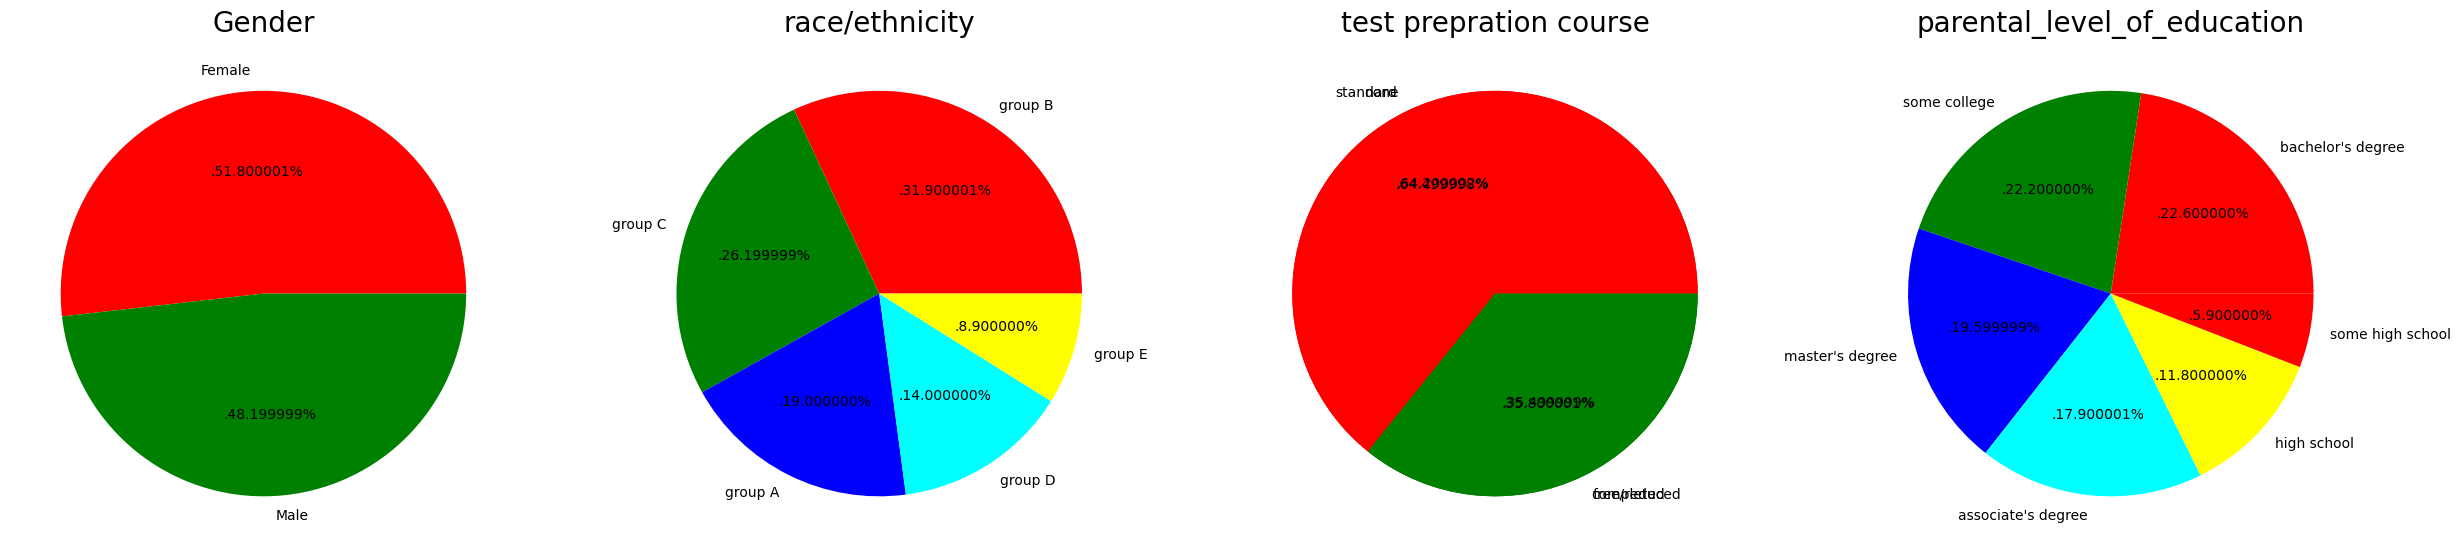

In [37]:
plt.rcParams['figure.figsize']= (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%' )
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels =  'group B' ,'group C' ,'group A', 'group D', 'group E'
color = ['red','green','blue','cyan','yellow']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%' )
plt.title('race/ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels =  'standard' ,'free/reduced'
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%' )
plt.title('lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['parental_level_of_education'].value_counts()
labels =  "bachelor's degree" ,'some college', "master's degree" ,"associate's degree",'high school', 'some high school'
color =  ['red','green','blue','cyan','yellow']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%' )
plt.title('parental_level_of_education', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['test_preparation_course'].value_counts()
labels =  'none', 'completed'
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%' )
plt.title('test prepration course', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

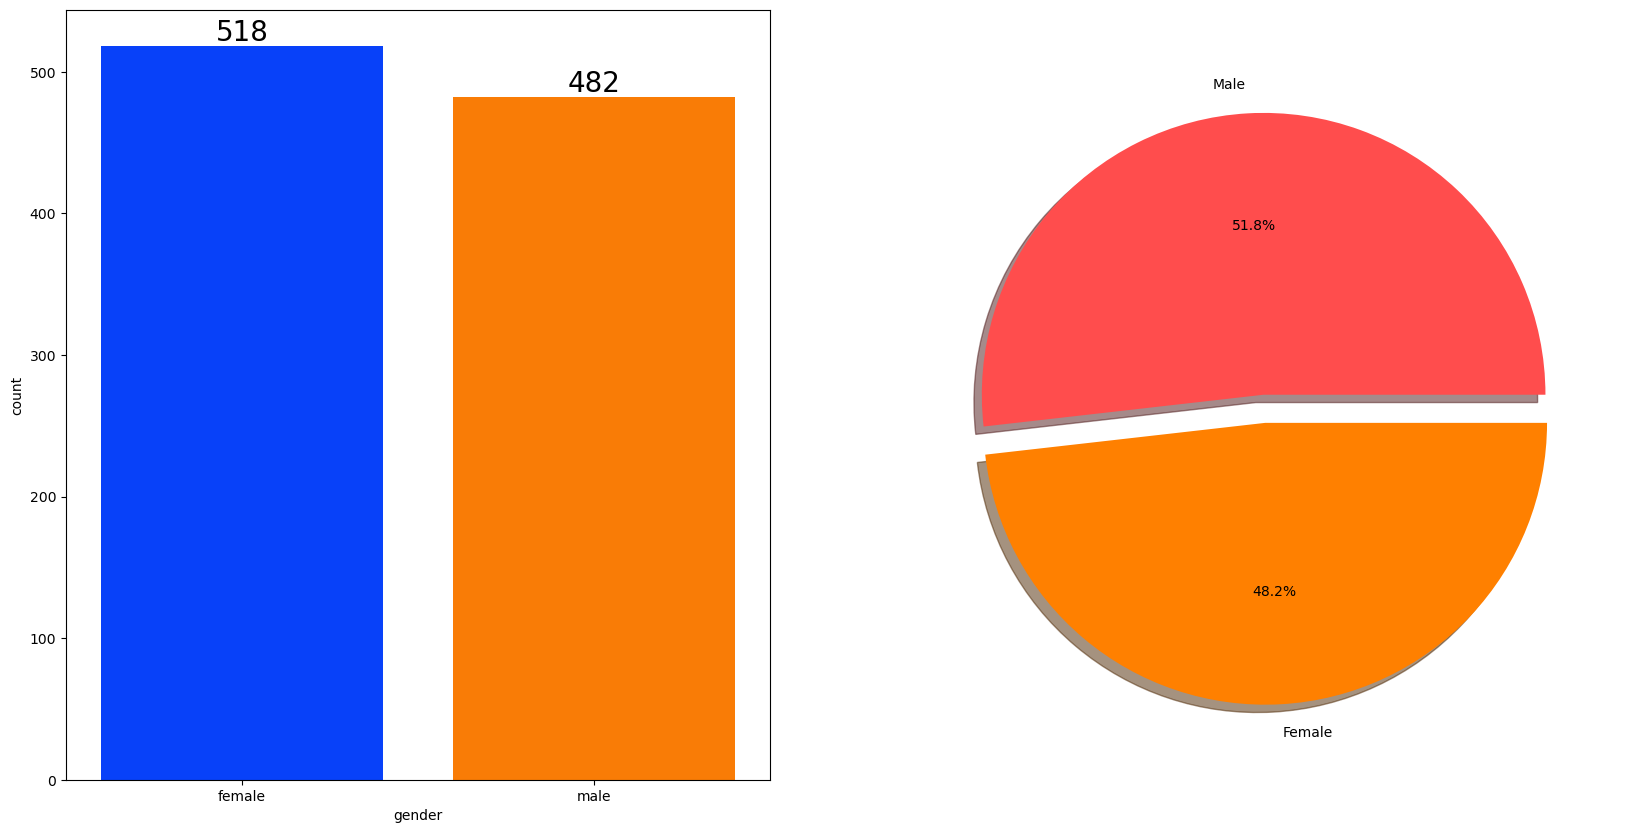

In [46]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [54]:
# gender_group=df.groupby("gender").mean()
# gender_group

TypeError: Could not convert group Bgroup Cgroup Bgroup Bgroup Bgroup Bgroup Bgroup Agroup Cgroup Bgroup Cgroup Bgroup Cgroup Cgroup Dgroup Dgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Bgroup Egroup Agroup Cgroup Dgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Cgroup Cgroup Dgroup Agroup Dgroup Egroup Bgroup Cgroup Cgroup Dgroup Agroup Dgroup Cgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Dgroup Bgroup Bgroup Dgroup Dgroup Egroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Dgroup Cgroup Egroup Cgroup Dgroup Bgroup Cgroup Egroup Bgroup Egroup Egroup Cgroup Bgroup Bgroup Cgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Cgroup Egroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Bgroup Bgroup Bgroup Cgroup Egroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Dgroup Bgroup Egroup Cgroup Bgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Dgroup Egroup Dgroup Dgroup Cgroup Egroup Cgroup Dgroup Dgroup Bgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Bgroup Cgroup Cgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Bgroup Dgroup Cgroup Bgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Cgroup Dgroup Agroup Dgroup Cgroup Dgroup Dgroup Dgroup Dgroup Agroup Bgroup Egroup Agroup Egroup Egroup Cgroup Dgroup Dgroup Cgroup Bgroup Cgroup Cgroup Agroup Dgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Dgroup Dgroup Agroup Cgroup Cgroup Agroup Cgroup Dgroup Agroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Egroup Egroup Cgroup Cgroup Dgroup Agroup Cgroup Cgroup Cgroup Dgroup Bgroup Dgroup Dgroup Dgroup Bgroup Cgroup Agroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Dgroup Bgroup Egroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Egroup Dgroup Bgroup Cgroup Cgroup Dgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Dgroup Agroup Cgroup Bgroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Egroup Dgroup Cgroup Cgroup Egroup Bgroup Bgroup Dgroup Dgroup Egroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Egroup Cgroup Cgroup Dgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Egroup Bgroup Cgroup Cgroup Agroup Cgroup Egroup Cgroup Egroup Cgroup Bgroup Cgroup Bgroup Dgroup Dgroup Dgroup Bgroup Egroup Bgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Bgroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Cgroup Egroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Dgroup Egroup Bgroup Dgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Cgroup Cgroup Cgroup Bgroup Egroup Dgroup Bgroup Cgroup Egroup Bgroup Agroup Cgroup Cgroup Cgroup Cgroup Egroup Dgroup Cgroup Dgroup Bgroup Bgroup Cgroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Agroup Dgroup Bgroup Bgroup Cgroup Bgroup Egroup Bgroup Cgroup Bgroup Dgroup Bgroup Egroup Egroup Cgroup Egroup Bgroup Cgroup Dgroup Egroup Cgroup Cgroup Agroup Bgroup Cgroup Agroup Dgroup Bgroup Cgroup Cgroup Cgroup Dgroup Agroup Cgroup Bgroup Cgroup Agroup Cgroup Dgroup Bgroup Dgroup Cgroup Agroup Egroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Cgroup Dgroup Dgroup Egroup Bgroup Egroup Cgroup Egroup Dgroup Egroup Egroup Agroup Egroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Bgroup Egroup Cgroup Cgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Bgroup Cgroup Dgroup Egroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Dgroup Egroup Cgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Agroup Dgroup Bgroup Dgroup Dgroup Egroup Cgroup Dgroup D to numeric